# 5회 기출 - 작업2유형
- 벤츠 차량 가격 예측 : https://www.kaggle.com/datasets/mysarahmadbhat/mercedes-used-car-listing 
- train = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_train_.csv 
- test = https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_test_.csv
- 예측 변수 price, test.csv에 대해 price 값을 예측하여 제출, 제출 데이터 컬럼은 price만 존재해야함.
- 평가지표는 rmse

## 주의사항
- 상관관계 분석 시 통계분석을 포함할 것

## 데이터 로드 및 전처리

## 데이터 로드

In [1]:
import pandas as pd

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.4f}'.format

In [4]:
XY = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_train_.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p2_test_.csv')

Y = XY[['ID', 'price']]
X = XY.drop(columns=['price'])

print([x.columns for x in [X, X_submission, Y]])
print([x.shape for x in [X, X_submission, Y]])

[Index(['ID', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object'), Index(['ID', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object'), Index(['ID', 'price'], dtype='object')]
[(9823, 9), (3296, 9), (9823, 2)]


## 데이터 분석(EDA)

In [5]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9823 non-null   int64  
 1   model         9823 non-null   object 
 2   year          9823 non-null   int64  
 3   transmission  9823 non-null   object 
 4   mileage       9823 non-null   int64  
 5   fuelType      9823 non-null   object 
 6   tax           9823 non-null   int64  
 7   mpg           9823 non-null   float64
 8   engineSize    9823 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 690.8+ KB
None


In [6]:
print(X.head(2))

      ID      model  year transmission  mileage fuelType  tax     mpg  \
0  10170    A Class  2012    Automatic    46000   Diesel   30 64.2000   
1   9551   CL Class  2020    Semi-Auto       19   Petrol  150 36.7000   

   engineSize  
0      2.1000  
1      2.0000  


In [7]:
print(X_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3296 non-null   int64  
 1   model         3296 non-null   object 
 2   year          3296 non-null   int64  
 3   transmission  3296 non-null   object 
 4   mileage       3296 non-null   int64  
 5   fuelType      3296 non-null   object 
 6   tax           3296 non-null   int64  
 7   mpg           3296 non-null   float64
 8   engineSize    3296 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 231.9+ KB
None


In [8]:
print(X_submission.head(2))

   ID      model  year transmission  mileage fuelType  tax     mpg  engineSize
0   0        SLK  2005    Automatic    63000   Petrol  325 32.1000      1.8000
1   2   SL CLASS  2016    Automatic     6200   Petrol  555 28.0000      5.5000


In [9]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      9823 non-null   int64
 1   price   9823 non-null   int64
dtypes: int64(2)
memory usage: 153.6 KB
None


In [10]:
print(Y.head(2))

      ID  price
0  10170  11940
1   9551  38624


## 결측치 처리

In [18]:
dfX = pd.concat([X, X_submission], axis=0, ignore_index=True)
print(dfX.head(2))

      ID      model  year transmission  mileage fuelType  tax     mpg  \
0  10170    A Class  2012    Automatic    46000   Diesel   30 64.2000   
1   9551   CL Class  2020    Semi-Auto       19   Petrol  150 36.7000   

   engineSize  
0      2.1000  
1      2.0000  


In [19]:
print(dfX.isna().sum())

ID              0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


## 상관관계 분석 (Encoding 전)

In [21]:
dfXY = pd.merge(dfX, Y, on='ID')
dfXY.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9822
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9823 non-null   int64  
 1   model         9823 non-null   object 
 2   year          9823 non-null   int64  
 3   transmission  9823 non-null   object 
 4   mileage       9823 non-null   int64  
 5   fuelType      9823 non-null   object 
 6   tax           9823 non-null   int64  
 7   mpg           9823 non-null   float64
 8   engineSize    9823 non-null   float64
 9   price         9823 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 844.2+ KB


In [23]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} : {dfX[feature].unique()}')

model : [' A Class' ' CL Class' ' B Class' ' E Class' ' GLE Class' ' C Class'
 ' GLC Class' ' GLA Class' ' SLK' ' SL CLASS' ' V Class' ' CLS Class'
 ' X-CLASS' ' M Class' ' GL Class' ' CLA Class' ' G Class' ' S Class'
 ' GLS Class' ' CLK' ' GLB Class' ' CLC Class' '230' '180' ' R Class'
 '200' '220']
transmission : ['Automatic' 'Semi-Auto' 'Manual' 'Other']
fuelType : ['Diesel' 'Petrol' 'Hybrid' 'Other']


In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [26]:
model = ols(formula='price ~ C(model)', data=dfXY).fit()
f_model = sm.stats.anova_lm(model, typ=1)
print(f_model)

                 df               sum_sq             mean_sq        F  PR(>F)
C(model)    25.0000 420,378,127,077.0430 16,815,125,083.0817 171.8311  0.0000
Residual 9,797.0000 958,719,145,914.5748     97,858,440.9426      NaN     NaN


In [27]:
model = ols(formula='price ~ C(transmission)', data=dfXY).fit()
f_transmission = sm.stats.anova_lm(model, typ=1)
print(f_transmission)

                        df                 sum_sq             mean_sq  \
C(transmission)     3.0000   114,579,713,102.1097 38,193,237,700.7032   
Residual        9,819.0000 1,264,517,559,889.5110    128,782,723.2803   

                       F  PR(>F)  
C(transmission) 296.5711  0.0000  
Residual             NaN     NaN  


In [28]:
model = ols(formula='price ~ C(fuelType)', data=dfXY).fit()
f_fuelType = sm.stats.anova_lm(model, typ=1)
print(f_fuelType)

                    df                 sum_sq             mean_sq        F  \
C(fuelType)     3.0000    52,348,867,710.4947 17,449,622,570.1649 129.1412   
Residual    9,819.0000 1,326,748,405,281.1267    135,120,521.9759      NaN   

             PR(>F)  
C(fuelType)  0.0000  
Residual        NaN  


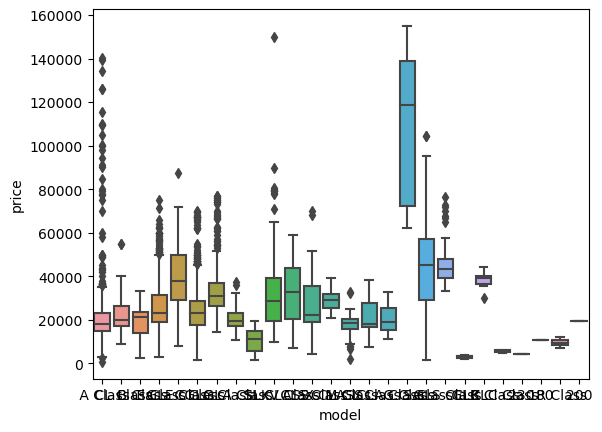

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

data = dfXY[['model', 'transmission', 'fuelType', 'price']]
sns.boxplot(data=data, y='price', x='model')
plt.show()

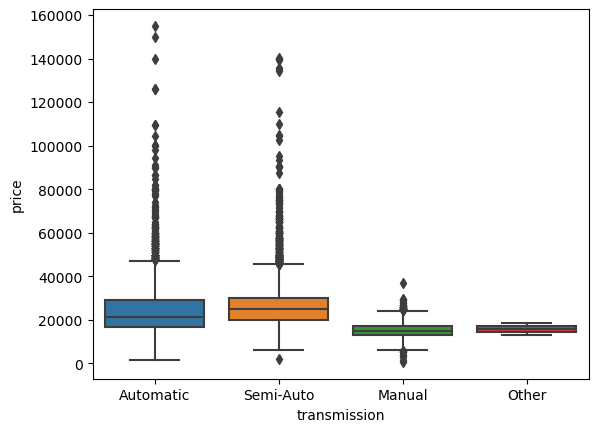

In [32]:
sns.boxplot(data=data, y='price', x='transmission')
plt.show()

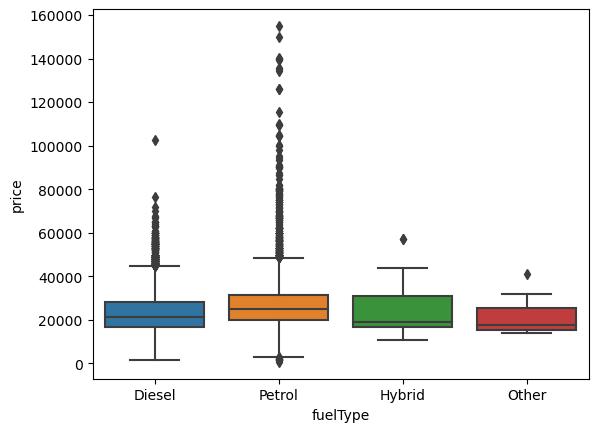

In [33]:
sns.boxplot(data=data, y='price', x='fuelType')
plt.show()

## Encoding

In [34]:
print(dfX.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            13119 non-null  int64  
 1   model         13119 non-null  object 
 2   year          13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB
None


In [35]:
print(dfX.nunique())

ID              13119
model              27
year               25
transmission        4
mileage          9716
fuelType            4
tax                40
mpg               120
engineSize         26
dtype: int64


In [36]:
for feature in dfX.select_dtypes(include='object').columns:
    print(f'{feature} : {dfX[feature].unique()}')

model : [' A Class' ' CL Class' ' B Class' ' E Class' ' GLE Class' ' C Class'
 ' GLC Class' ' GLA Class' ' SLK' ' SL CLASS' ' V Class' ' CLS Class'
 ' X-CLASS' ' M Class' ' GL Class' ' CLA Class' ' G Class' ' S Class'
 ' GLS Class' ' CLK' ' GLB Class' ' CLC Class' '230' '180' ' R Class'
 '200' '220']
transmission : ['Automatic' 'Semi-Auto' 'Manual' 'Other']
fuelType : ['Diesel' 'Petrol' 'Hybrid' 'Other']


In [37]:
from sklearn.preprocessing import LabelEncoder

for feature in dfX.select_dtypes(include='object').columns:
    dfX[feature] = LabelEncoder().fit_transform(dfX[feature])

In [38]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            13119 non-null  int64  
 1   model         13119 non-null  int64  
 2   year          13119 non-null  int64  
 3   transmission  13119 non-null  int64  
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  int64  
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 922.6 KB


## 상관관계 분석 (Encoding 후)

In [39]:
dfXY = pd.merge(dfX, Y, on='ID')
print([x.shape for x in [dfXY, dfX, Y]])

[(9823, 10), (13119, 9), (9823, 2)]


In [40]:
dfXY.corr()['price']

ID             -0.0994
model           0.3374
year            0.5194
transmission    0.1360
mileage        -0.5375
fuelType        0.1940
tax             0.2645
mpg            -0.4349
engineSize      0.5193
price           1.0000
Name: price, dtype: float64

In [42]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            13119 non-null  int64  
 1   model         13119 non-null  int64  
 2   year          13119 non-null  int64  
 3   transmission  13119 non-null  int64  
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  int64  
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 922.6 KB


## 모델링 - 사전처리

In [90]:
# 평가지표는 rmse
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle

import numpy as np

def get_model_score(model, xtrain, xtest, ytrain, ytest):
    ypred1 = model.predict(xtrain)
    ypred2 = model.predict(xtest)
    
    A1 = mse(ytrain, ypred1)
    A2 = mse(ytest, ypred2)
    B = mae(ytest, ypred2)
    C = np.sqrt(A2)
    
    ypred2 = np.where(ypred2 < 0, 0, ypred2)
    D = msle(ytest, ypred2)
    E = np.sqrt(D)
    
    scores = pd.Series([A1, A2, B, C, D, E], index='MSE(T) MSE(V) MAE RMSE MSLE RMSLE'.split())
    return scores

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def compare_model(xtrain, xtest, ytrain, ytest):
    result = pd.DataFrame()
    
    model = LinearRegression().fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)

    # n_neighbors=5
    model = KNeighborsClassifier().fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
    
    # for n in range(3, 10):
    #     model = KNeighborsClassifier(n_neighbors=n).fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{n}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)        
    
    # max_depth=None
    model = DecisionTreeRegressor(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
    
    # for d in range(1, 10):
    #     model = DecisionTreeRegressor(max_depth=d, random_state=1234).fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{d}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
        
    # n_estimators=100
    model = RandomForestRegressor(random_state=1234).fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
    
    # for d in range(1, 10):
    #     model = RandomForestRegressor(max_depth=d, random_state=1234).fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{d}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)    

    # n_estimators = 500
    model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    result[f'{model.__class__.__name__}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
    
    # for n in range(100, 1001, 100):
    #     model = XGBRegressor(n_estimators=n, objective='reg:squarederror').fit(xtrain, ytrain)
    #     result[f'{model.__class__.__name__}_{n}'] = get_model_score(model, xtrain, xtest, ytrain ,ytest)
    
    result = result.T
    result.insert(loc=2, column='DIFF', value=(result['MSE(T)'] - result['MSE(V)']).abs())
    return result

In [68]:
from sklearn.preprocessing import StandardScaler

def get_model_data(dfX, Y, train_size, is_scaled=False):
    X_temp = dfX.drop(columns=['ID'])
    YF = Y['price']
    
    if is_scaled:
        X_temp = StandardScaler().fit_transform(X_temp)
    
    XF = X_temp[:train_size]
    X_submissionF = X_temp[train_size:]
    
    return XF, X_submissionF, YF

## 모델 선택 - 정규화 전

In [115]:
XF, X_submissionF, YF = get_model_data(dfX, Y, len(X), is_scaled=False)

print([x.shape for x in [X, X_submission, Y]])
print([x.shape for x in [XF, X_submissionF, YF]])

[(9823, 9), (3296, 9), (9823, 2)]
[(9823, 8), (3296, 8), (9823,)]


In [116]:
from sklearn.model_selection import train_test_split

xtrain_1, xtest_1, ytrain_1, ytest_1 = train_test_split(XF, YF, test_size=0.3, random_state=1234)

print([x.shape for x in [xtrain_1, xtest_1, ytrain_1, ytest_1]])

[(6876, 8), (2947, 8), (6876,), (2947,)]


In [117]:
result_1 = compare_model(xtrain_1, xtest_1, ytrain_1, ytest_1)

In [118]:
result_1.sort_values(['MSE(V)', 'RMSE'], ascending=[True, True])
# XGBRegressor	        1,939,156.1962	6,841,257.4932	4,902,101.2970	1,616.7886	2,615.5798	0.0100	0.1000
# RandomForestRegressor	1,119,491.7878	7,336,024.6242	6,216,532.8364	1,645.6332	2,708.5097	0.0106	0.1028
# XGBRegressor_200	    1,055,601.7193	6,810,663.0738	5,755,061.3545	1,621.4964	2,609.7247	0.0101	0.1004

,MSE(T),MSE(V),DIFF,MAE,RMSE,MSLE,RMSLE
XGBRegressor_200,"1,055,601.7193","6,810,663.0738","5,755,061.3545","1,621.4964","2,609.7247",0.0101,0.1004
XGBRegressor,"1,939,156.1962","6,841,257.4932","4,902,101.2970","1,616.7886","2,615.5798",0.0100,0.1000
XGBRegressor_100,"1,939,156.1962","6,841,257.4932","4,902,101.2970","1,616.7886","2,615.5798",0.0100,0.1000
XGBRegressor_300,"626,033.4411","6,898,637.9057","6,272,604.4646","1,632.6959","2,626.5258",0.0103,0.1014
XGBRegressor_400,"414,345.0418","6,970,535.1036","6,556,190.0618","1,646.8313","2,640.1771",0.0105,0.1023
XGBRegressor_500,"286,232.7337","7,040,069.3799","6,753,836.6462","1,659.8800","2,653.3129",0.0107,0.1032
XGBRegressor_600,"209,224.9907","7,099,947.9088","6,890,722.9182","1,672.1624","2,664.5727",0.0108,0.1039
XGBRegressor_700,"156,002.5585","7,130,620.5654","6,974,618.0069","1,680.3636","2,670.3222",0.0109,0.1046
XGBRegressor_800,"118,136.4914","7,151,614.1991","7,033,477.7078","1,684.5958","2,674.2502",0.0110,0.1048
XGBRegressor_900,"90,480.4039","7,180,878.6167","7,090,398.2128","1,691.4226","2,679.7161",0.0110,0.1050


## 모델 선택 - 정규화

In [111]:
XF, X_submissionF, YF = get_model_data(dfX, Y, len(X), is_scaled=True)

print([x.shape for x in [X, X_submission, Y]])
print([x.shape for x in [XF, X_submissionF, YF]])

[(9823, 9), (3296, 9), (9823, 2)]
[(9823, 8), (3296, 8), (9823,)]


In [112]:
from sklearn.model_selection import train_test_split

xtrain_2, xtest_2, ytrain_2, ytest_2 = train_test_split(XF, YF, test_size=0.3, random_state=1234)

print([x.shape for x in [xtrain_2, xtest_2, ytrain_2, ytest_2]])

[(6876, 8), (2947, 8), (6876,), (2947,)]


In [113]:
result_2 = compare_model(xtrain_2, xtest_2, ytrain_2, ytest_2)

In [114]:
result_2.sort_values(['MSE(V)', 'RMSE'], ascending=[True, True])
# XGBRegressor	        1,939,156.1962	6,841,257.4932	4,902,101.2970	1,616.7886	2,615.5798	0.0100	0.1000
# RandomForestRegressor	1,119,491.7878	7,336,024.6242	6,216,532.8364	1,645.6332	2,708.5097	0.0106	0.1028
# XGBRegressor_200	    1,055,601.7193	6,810,663.0738	5,755,061.3545	1,621.4964	2,609.7247	0.0101	0.1004

,MSE(T),MSE(V),DIFF,MAE,RMSE,MSLE,RMSLE
XGBRegressor_200,"1,055,601.7193","6,811,398.0733","5,755,796.3540","1,621.0053","2,609.8655",0.0099,0.0997
XGBRegressor,"1,939,156.1962","6,840,236.4829","4,901,080.2866","1,616.2026","2,615.3846",0.0098,0.0992
XGBRegressor_100,"1,939,156.1962","6,840,236.4829","4,901,080.2866","1,616.2026","2,615.3846",0.0098,0.0992
XGBRegressor_300,"626,033.4411","6,899,928.0869","6,273,894.6458","1,632.2683","2,626.7714",0.0101,0.1007
XGBRegressor_400,"414,345.0418","6,972,093.5246","6,557,748.4828","1,646.4037","2,640.4722",0.0103,0.1016
XGBRegressor_500,"286,232.7337","7,042,297.9609","6,756,065.2272","1,659.6788","2,653.7328",0.0105,0.1026
XGBRegressor_600,"209,224.9907","7,102,593.4017","6,893,368.4110","1,671.9943","2,665.0691",0.0107,0.1032
XGBRegressor_700,"156,002.5585","7,134,217.7136","6,978,215.1551","1,680.3927","2,670.9956",0.0108,0.1039
XGBRegressor_800,"118,136.4914","7,154,999.7216","7,036,863.2303","1,684.5712","2,674.8831",0.0109,0.1042
XGBRegressor_900,"90,480.4039","7,184,427.8565","7,093,947.4526","1,691.4178","2,680.3783",0.0109,0.1044


## 모델 선택 - 최종

In [119]:
# XGBRegressor_200	    1,055,601.7193	6,810,663.0738	5,755,061.3545	1,621.4964	2,609.7247	0.0101	0.1004
model = XGBRegressor(n_estimators=200, objective='reg:squarederror').fit(xtrain_1, ytrain_1)
print(get_model_score(model, xtrain_1, xtest_1, ytrain_1, ytest_1))

MSE(T)   1,055,601.7193
MSE(V)   6,810,663.0738
MAE          1,621.4964
RMSE         2,609.7247
MSLE             0.0101
RMSLE            0.1004
dtype: float64


In [120]:
Y_pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID': X_submission['ID'], 'price': Y_pred})
submission.to_csv('./submission.csv', index=False)

### 제출 파일 확인

In [121]:
temp = pd.read_csv('./submission.csv')
temp.head()

,ID,price
0,0,"3,807.6638"
1,2,"55,132.7230"
2,14,"16,815.1040"
3,15,"14,074.3300"
4,18,"15,184.2420"


In [123]:
X_submission.head()

,ID,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,SLK,2005,Automatic,63000,Petrol,325,32.1000,1.8000
1,2,SL CLASS,2016,Automatic,6200,Petrol,555,28.0000,5.5000
2,14,GLA Class,2016,Automatic,41713,Diesel,125,56.6000,2.1000
3,15,B Class,2017,Automatic,24841,Diesel,150,68.9000,1.5000
4,18,B Class,2017,Automatic,14128,Diesel,150,68.9000,2.1000
